In [1]:
import matplotlib
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
import os
import itertools

In [52]:
basedir="/data/develop/export_mkv_k4a/test_system/"
CAMS = ["cn01", "cn02", "cn03", "cn04", "cn05", "cn06"]

# we skip the first 5 frames of each recording
all_timestamps = []
for cam in CAMS:
    fpath = os.path.join(basedir, cam, "timestamp.csv")
    if os.path.exists(fpath):
        ts = pd.read_csv(fpath)
        ts.set_index("frameindex", inplace=True)
        # ts = ts[["depth_dts", "color_dts"]]
        # for playback, depth_dts == color_dts
        ts = ts[["depth_dts"]]
        ts.rename(columns={"depth_dts": cam + "_depth_dts", "color_dts": cam + "_color_dts"}, inplace=True)
        all_timestamps.append(ts)

In [53]:
from functools import reduce
df = reduce(lambda x, y: pd.merge(x, y, on = 'frameindex'), all_timestamps)

In [54]:
df.tail()

,cn01_depth_dts,cn02_depth_dts,cn03_depth_dts,cn04_depth_dts,cn05_depth_dts,cn06_depth_dts
frameindex,,,,,,
2880,101751399,101752344,101752210,101752721,101752700,101752777
2885,101918066,101919010,101918877,101919388,101919366,101919444
2890,102084733,102085677,102085544,102086054,102086033,102086111
2895,102251399,102252344,102252210,102252721,102252700,102252777
2900,102418066,102419010,102418877,102419388,102419366,102419444


<AxesSubplot:xlabel='frameindex'>

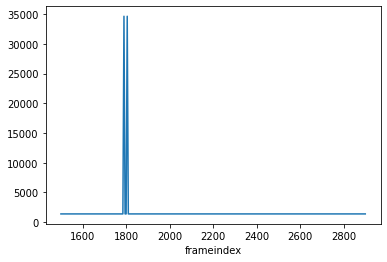

In [55]:
diffs = (df.max(axis=1) - df.min(axis=1))
diffs.plot()

In [192]:
frametimes_usec = {}
for key, df in zip(["cn01", "cn02", "cn03", "cn04"], all_device_timestamps):
    frametimes_usec[(key, "depth")] = df["depth_dts"].diff()
    frametimes_usec[(key, "color")] = df["color_dts"].diff()

frametimes_usec = pd.DataFrame(frametimes_usec)

In [193]:
(1000.*1000./ frametimes_usec).describe()

cn01                    cn02                    cn03              \
            depth       color       depth       color       depth       color   
count  394.000000  394.000000  394.000000  394.000000  394.000000  394.000000   
mean    13.680203   13.680207   13.197970   13.197966   13.451777   13.451787   
std      2.206690    2.206712    2.403644    2.403625    2.314675    2.314701   
min     10.000000    9.995502   10.000000    9.995502   10.000000    9.995602   
25%     10.000000   10.001100   10.000000   10.001100   10.000000   10.001100   
50%     14.999925   14.999925   14.999925   14.999925   14.999925   14.999925   
75%     14.999925   15.000150   14.999925   14.999925   14.999925   15.000150   
max     15.000150   15.010057   15.000150   15.007579   15.000150   15.007579   

             cn04              
            depth       color  
count  394.000000  394.000000  
mean    13.616751   13.616749  
std      2.239553    2.239558  
min     10.000000    9.997701  
25%     10.000000   10.001100  
50%     14.999925   14.999925  
75%     14.999925   15.000150  
max     15.000150   15.002625

In [194]:
(frametimes_usec / 1000.).describe()

cn01                    cn02                    cn03              \
            depth       color       depth       color       depth       color   
count  394.000000  394.000000  394.000000  394.000000  394.000000  394.000000   
mean    75.465312   75.465343   78.680203   78.680175   76.988155   76.988157   
std     14.711266   14.711440   16.024290   16.024151   15.431166   15.431355   
min     66.666000   66.622000   66.666000   66.633000   66.666000   66.633000   
25%     66.667000   66.666000   66.667000   66.667000   66.667000   66.666000   
50%     66.667000   66.667000   66.667000   66.667000   66.667000   66.667000   
75%    100.000000   99.989000  100.000000   99.989000  100.000000   99.989000   
max    100.000000  100.045000  100.000000  100.045000  100.000000  100.044000   

             cn04              
            depth       color  
count  394.000000  394.000000  
mean    75.888325   75.888353  
std     14.930352   14.930404  
min     66.666000   66.655000  
25%     66.667000   66.666000  
50%     66.667000   66.667000  
75%    100.000000   99.989000  
max    100.000000  100.023000

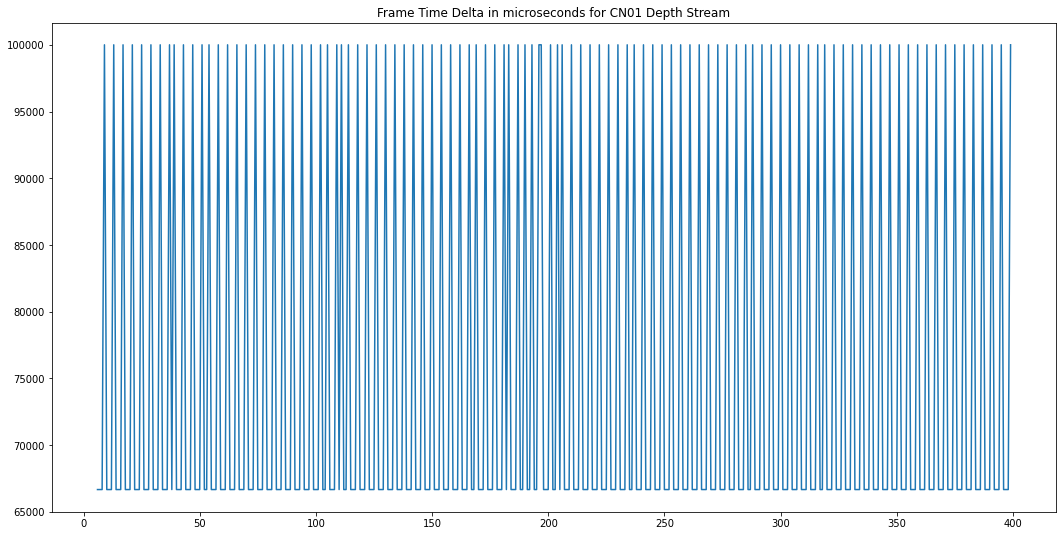

In [195]:
frametimes_usec[("cn01", "depth")].plot(figsize=(18,9))
plt.title("Frame Time Delta in microseconds for CN01 Depth Stream")
plt.savefig(os.path.join(basedir, "frametimes_cn01_depth.pdf"))

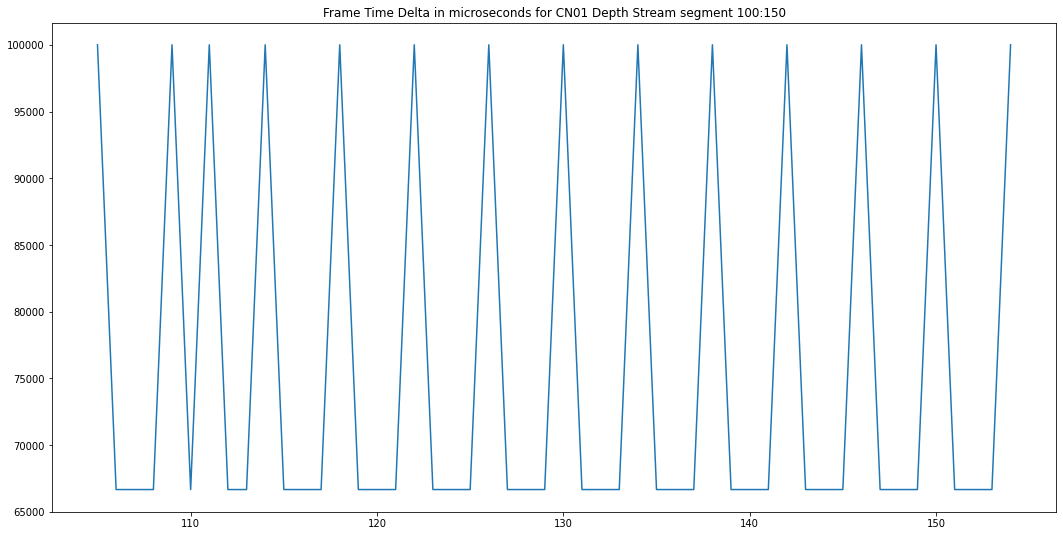

In [196]:
frametimes_usec[("cn01", "depth")][100:150].plot(figsize=(18,9))
plt.title("Frame Time Delta in microseconds for CN01 Depth Stream segment 100:150")
plt.savefig(os.path.join(basedir, "frametimes_cn01_depth_segment.pdf"))

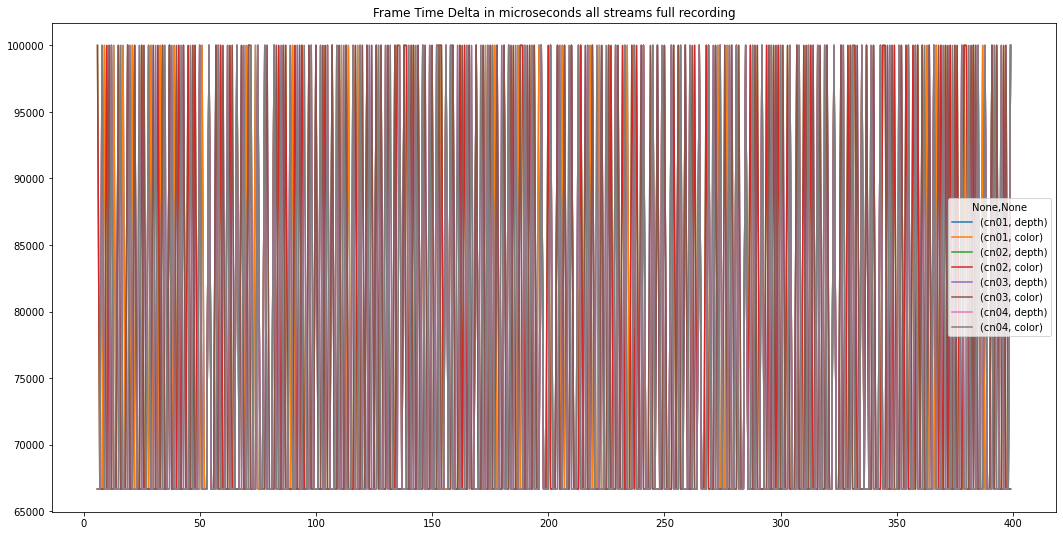

In [197]:
frametimes_usec.plot(figsize=(18,9))
plt.title("Frame Time Delta in microseconds all streams full recording")
plt.savefig(os.path.join(basedir, "frametimes_full.pdf"))

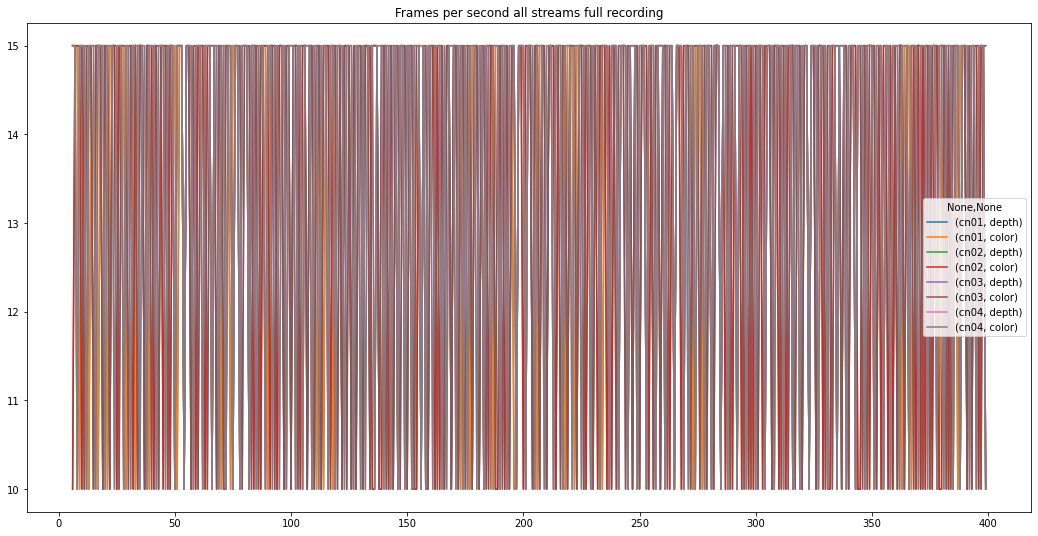

In [198]:
(1000.*1000./ frametimes_usec).plot(figsize=(18,9))
plt.title("Frames per second all streams full recording")
plt.savefig(os.path.join(basedir, "frames_per_second_full.pdf"))

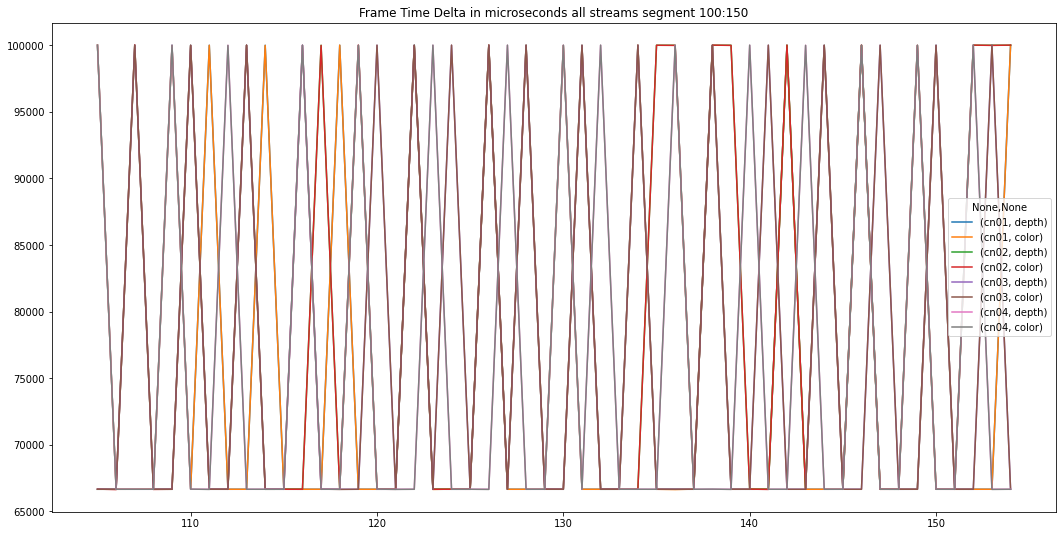

In [199]:
frametimes_usec[100:150].plot(figsize=(18,9))
plt.title("Frame Time Delta in microseconds all streams segment 100:150")
plt.savefig(os.path.join(basedir, "frametimes_segment.pdf"))

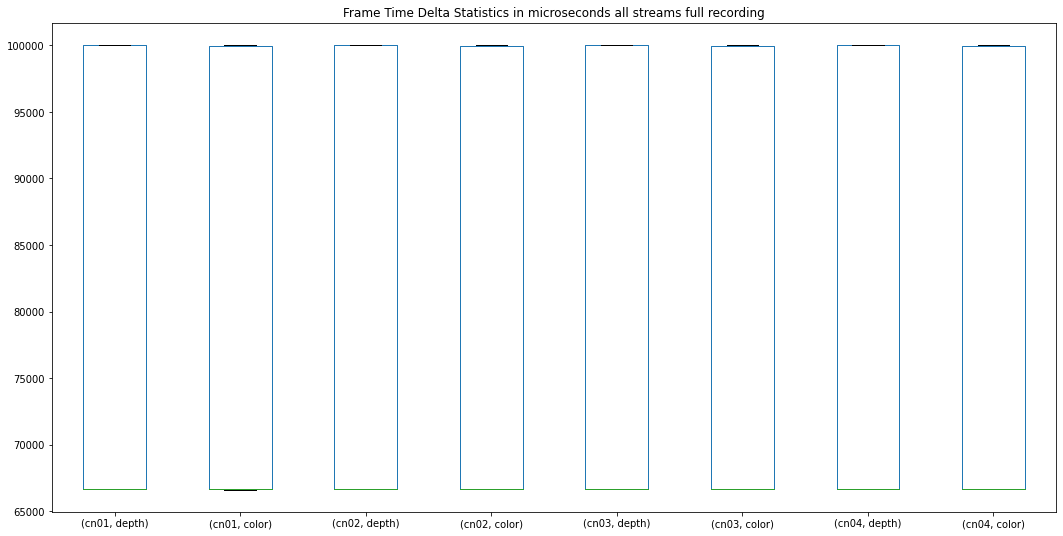

In [200]:
frametimes_usec.plot.box(figsize=(18,9))
plt.title("Frame Time Delta Statistics in microseconds all streams full recording")
plt.savefig(os.path.join(basedir, "frametimes_box.pdf"))

# What is die relative distance of the timestamps of corresponding frames between devices?

In [201]:
results_depth = {}
results_color = {}
for idx1, idx2 in itertools.combinations([0,1,2,3], 2):
    df1 = all_device_timestamps[idx1]
    df2 = all_device_timestamps[idx2]
    
    depth_dist = (df1["depth_dts"] - df2["depth_dts"]) / 1000.
    color_dist = (df1["color_dts"] - df2["color_dts"]) / 1000.
    
    results_depth["d-%d.%d" % (idx1,idx2)] = depth_dist 
    results_color["c-%d.%d" % (idx1,idx2)] = color_dist
results_depth = pd.DataFrame.from_dict(results_depth)
results_color = pd.DataFrame.from_dict(results_color)


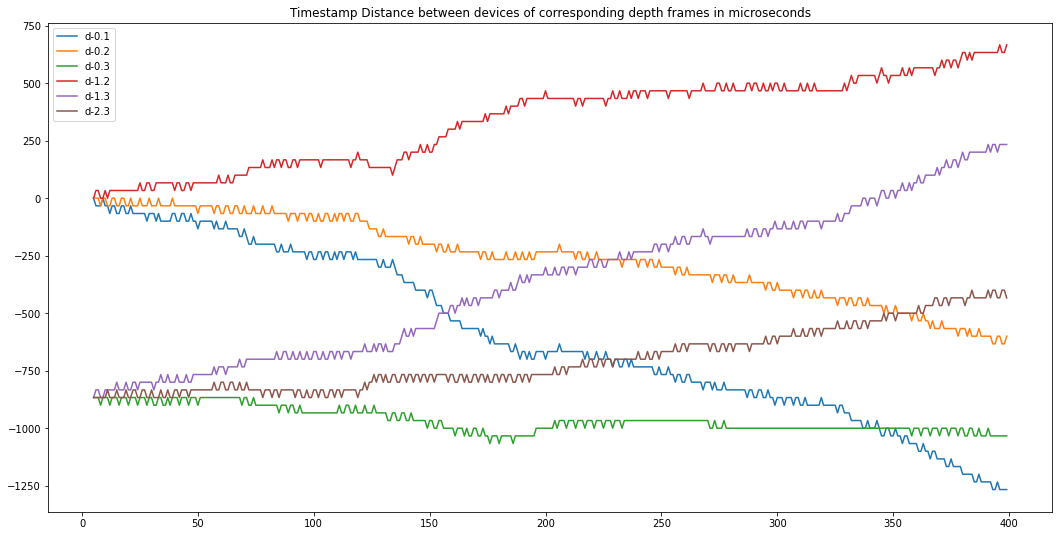

In [202]:
results_depth.plot(figsize=(18,9))
plt.title("Timestamp Distance between devices of corresponding depth frames in microseconds")
plt.savefig(os.path.join(basedir, "timestamp_diff_corresponding_depth_frames_beetween_devices.pdf"))

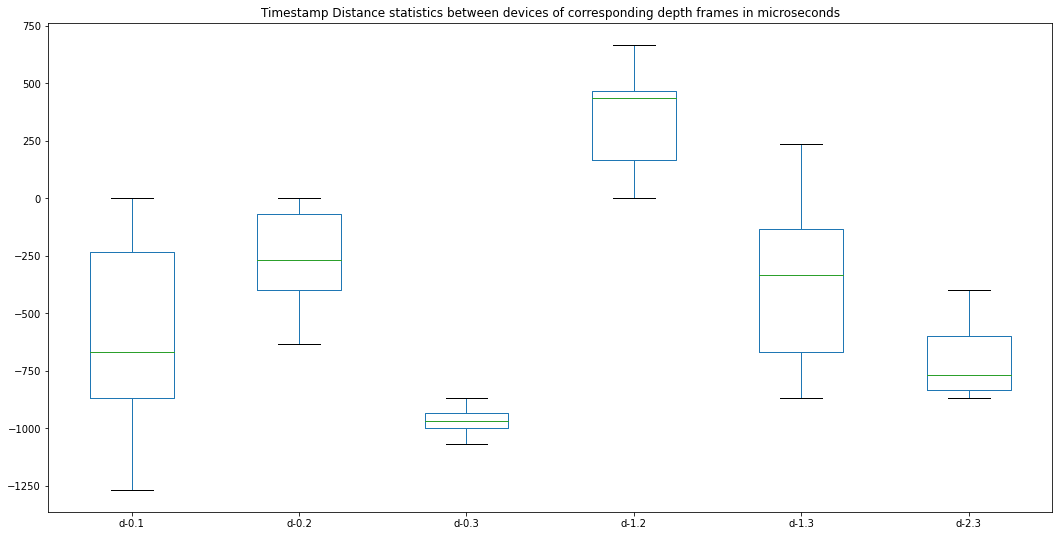

In [203]:
results_depth.plot.box(figsize=(18,9))
plt.title("Timestamp Distance statistics between devices of corresponding depth frames in microseconds")
plt.savefig(os.path.join(basedir, "timestamp_diff_corresponding_depth_frames_beetween_devices_box.pdf"))

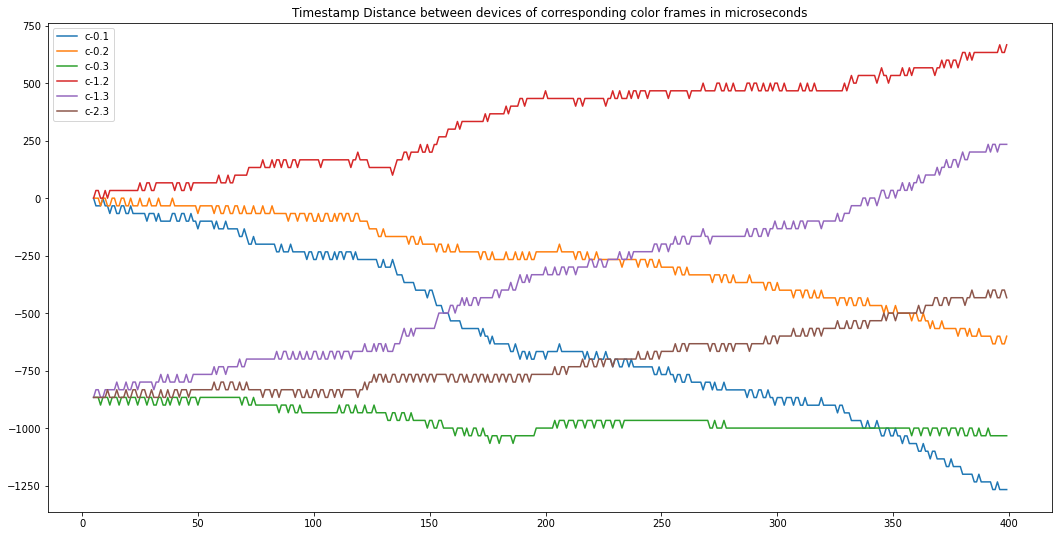

In [204]:
results_color.plot(figsize=(18,9))
plt.title("Timestamp Distance between devices of corresponding color frames in microseconds")
plt.savefig(os.path.join(basedir, "timestamp_diff_corresponding_color_frames_beetween_devices.pdf"))

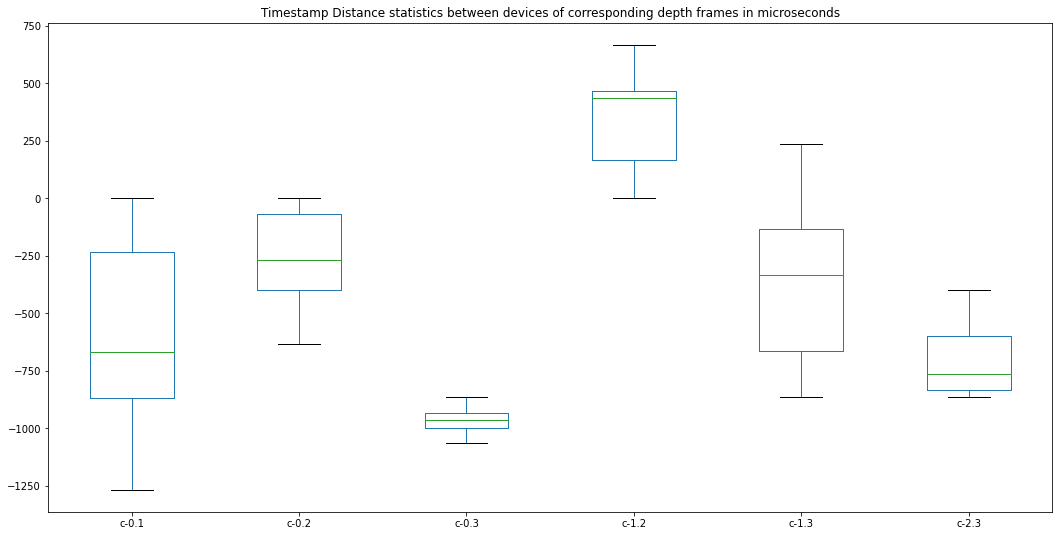

In [205]:
results_color.plot.box(figsize=(18,9))
plt.title("Timestamp Distance statistics between devices of corresponding depth frames in microseconds")
plt.savefig(os.path.join(basedir, "timestamp_diff_corresponding_color_frames_beetween_devices_box.pdf"))

# What is the relative distance between corresponding depth and color images?

In [206]:
results_depth2color = {}
for idx in [0,1,2,3]:
    df = all_device_timestamps[idx]
    
    depth2color_dist = (df1["depth_dts"] - df1["color_dts"]) / 1000.
    results_depth2color["d2c-%d" % idx] = depth2color_dist
results_depth2color = pd.DataFrame.from_dict(results_depth2color)

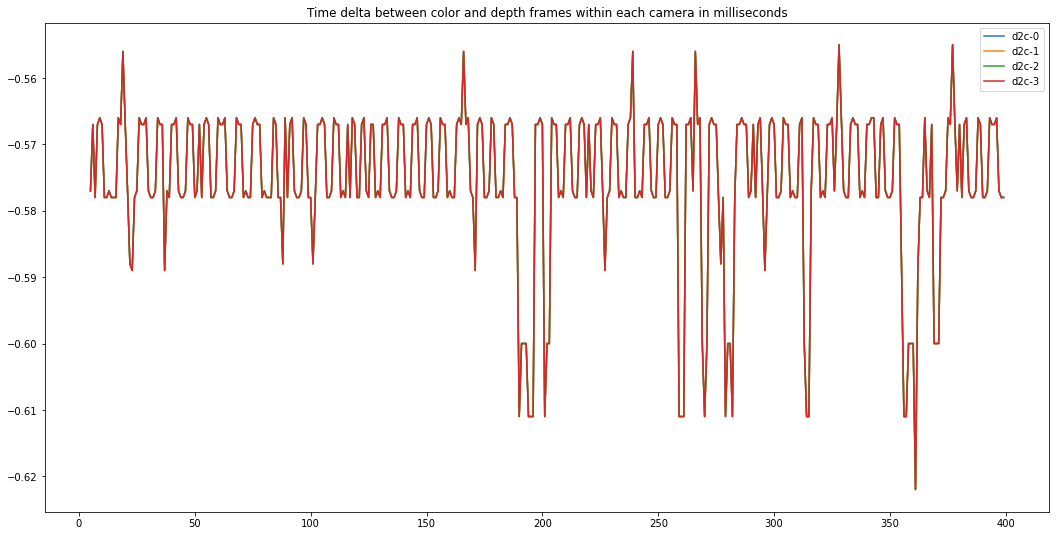

In [207]:
results_depth2color.plot(figsize=(18,9))
plt.title("Time delta between color and depth frames within each camera in milliseconds")
plt.savefig(os.path.join(basedir, "timestamp_diff_corresponding_frames_within_device.pdf"))

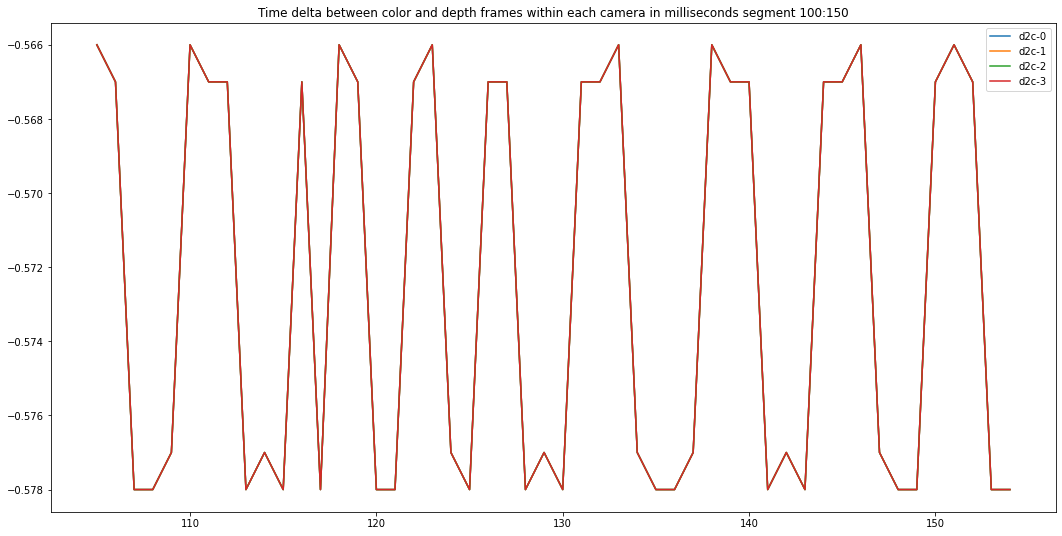

In [208]:
results_depth2color[100:150].plot(figsize=(18,9))
plt.title("Time delta between color and depth frames within each camera in milliseconds segment 100:150")
plt.savefig(os.path.join(basedir, "timestamp_diff_corresponding_frames_within_device_segment.pdf"))

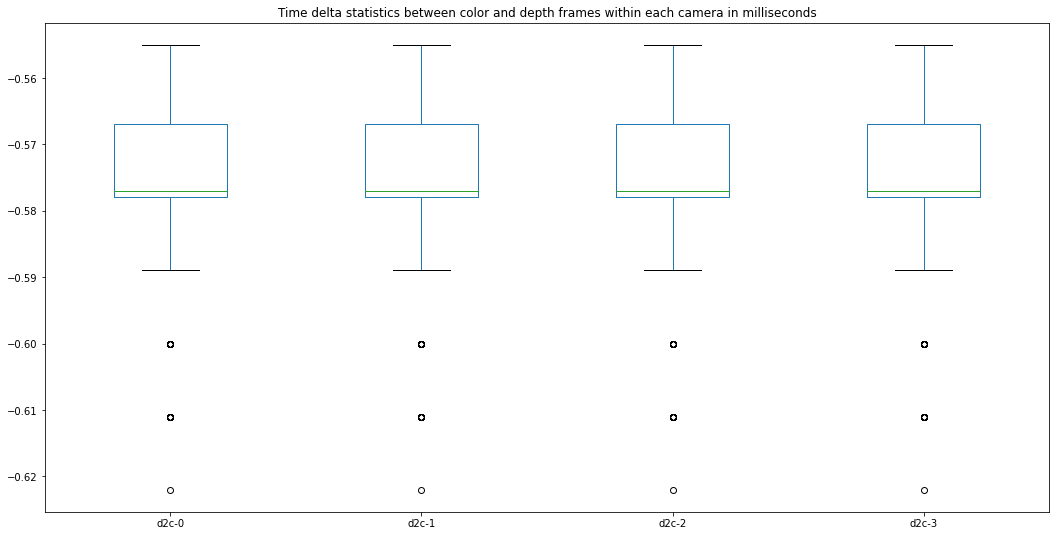

In [209]:
results_depth2color.plot.box(figsize=(18,9))
plt.title("Time delta statistics between color and depth frames within each camera in milliseconds")
plt.savefig(os.path.join(basedir, "timestamp_diff_corresponding_frames_within_device_box.pdf"))

# What is the biggest time difference between all streams per index?

In [210]:
all_timestamps = {}
for idx in [0,1,2,3]:
    df = all_device_timestamps[idx]
    all_timestamps[(idx, "depth")] = df["depth_dts"] / 1000.
    all_timestamps[(idx, "color")] = df["color_dts"] / 1000.
all_timestamps = pd.DataFrame.from_dict(all_timestamps)

max_diff_ts_per_frame = all_timestamps.T.max() - all_timestamps.T.min()


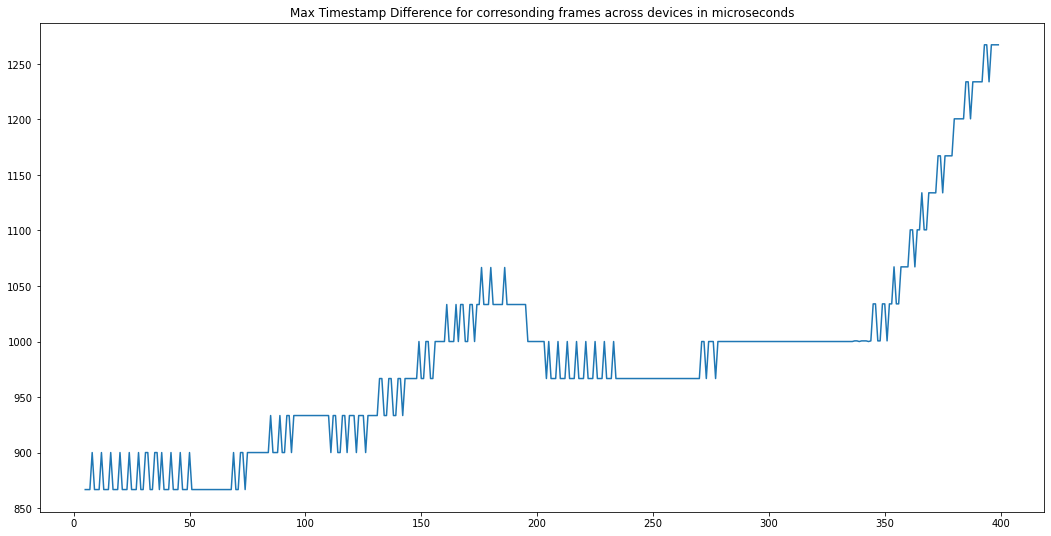

In [211]:
max_diff_ts_per_frame.plot(figsize=(18,9))
plt.title("Max Timestamp Difference for corresonding frames across devices in microseconds")
plt.savefig(os.path.join(basedir, "timestamp_diff_corresponding_frames_across_devices.pdf"))

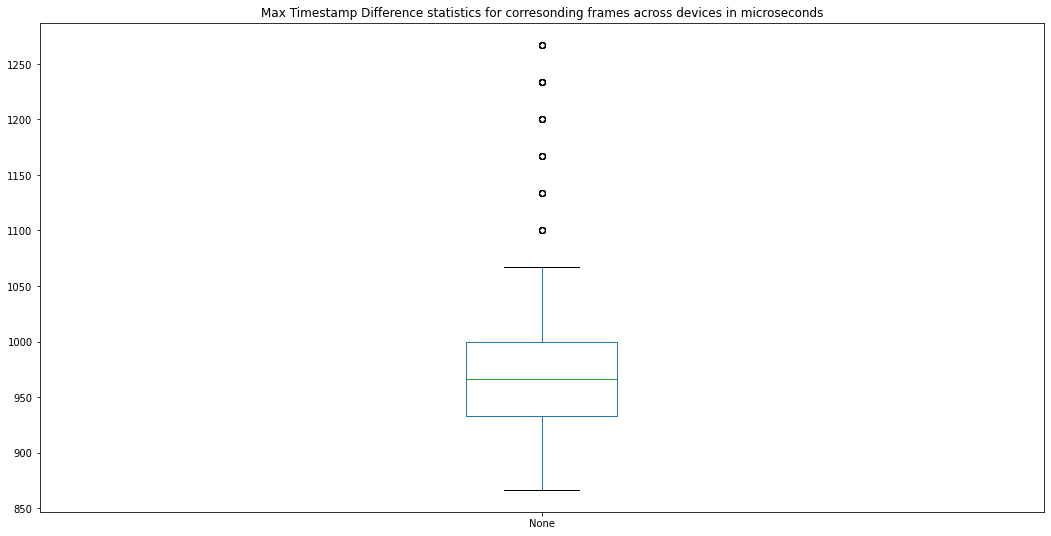

In [212]:
max_diff_ts_per_frame.plot.box(figsize=(18,9))
plt.title("Max Timestamp Difference statistics for corresonding frames across devices in microseconds")
plt.savefig(os.path.join(basedir, "timestamp_diff_corresponding_frames_across_devices_box.pdf"))

In [213]:
(max_diff_ts_per_frame / 1000.).describe()

count    395.000000
mean       0.981270
std        0.086941
min        0.866666
25%        0.933333
50%        0.966667
75%        1.000000
max        1.267245
dtype: float64